# Customer Churn Analysis – Data Overview

## Objective
Analyze customer churn patterns and identify key drivers influencing customer retention.

## Business Context

Customer churn refers to customers leaving the telecom service.
Reducing churn is critical because acquiring new customers is more expensive
than retaining existing ones.

This project aims to identify key factors influencing churn and
build predictive models to support retention strategies.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('../data/raw/telco_churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Dataset Description

This dataset contains customer demographic, service usage,
and billing information for churn analysis.

### Key Columns

| Column | Description |
|--------|-------------|
| tenure | Months with company |
| MonthlyCharges | Monthly charges |
| TotalCharges | Total lifetime charges |
| Contract | Contract type |
| Churn | Target variable |

In [4]:
print("Shape:", df.shape)

Shape: (7043, 21)


In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

In [6]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
# Missing values check
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
# Blank spaces in TotalCharges
(df['TotalCharges'] == ' ').sum()

np.int64(11)

The dataset contains missing or invalid values in the TotalCharges column,
primarily for customers with zero tenure.
These will be handled during data cleaning.

In [10]:
df['Churn'].value_counts()


Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [11]:
df['Churn'].value_counts(normalize=True)*100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

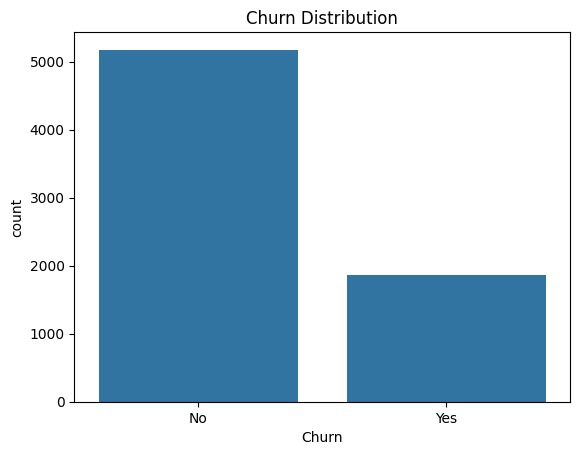

In [12]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

## Feature Types

- Numerical: tenure, MonthlyCharges, TotalCharges
- Categorical: Contract, PaymentMethod, InternetService
- Binary: gender, Partner, Dependents
- Target: Churn

In [13]:
df.select_dtypes(include='object').nunique().sort_values()

C:\Users\Hp\AppData\Local\Temp\ipykernel_16244\3978187768.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  df.select_dtypes(include='object').nunique().sort_values()


gender                 2
Partner                2
Dependents             2
PhoneService           2
PaperlessBilling       2
Churn                  2
OnlineSecurity         3
InternetService        3
StreamingTV            3
OnlineBackup           3
TechSupport            3
DeviceProtection       3
Contract               3
StreamingMovies        3
MultipleLines          3
PaymentMethod          4
TotalCharges        6531
customerID          7043
dtype: int64

## Data Quality Issues Identified

- `TotalCharges` stored as object instead of numeric due to blank values.
- Presence of missing/blank entries in `TotalCharges`.
- Mixed binary and categorical formats.
- customerID has no predictive value.


## Initial Hypotheses

1. Customers with month-to-month contracts are more likely to churn.
2. New customers have higher churn rates.
3. Higher monthly charges increase churn probability.

## Risks and Considerations

- Class imbalance in churn
- Potential data leakage
- Categorical encoding complexity
- Business cost of false negatives